## _Computer Vision_
### Lab 4, _Frequency Filters_.
#### >> Topics  :
* ##### Skeleton
* ##### Filtering In Frequency Domain

##### >> Note  :
> ##### to close image windows smoothly please **press Esc** on your keyboard, **don't close** it directly by clicking on 'X' to avoid kernel interruption.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

### Section 0, _Helper Functions_:
> ##### This cell contains some helper function such as error_handler, please run it without any modification.

In [2]:
# please don't modify this code.
def error_handler(func):
    def wrapper(*args, **kwargs):
        try:
            return func(*args, **kwargs)
        except Exception as ex:
            cv.destroyAllWindows()
            print(f'Error: {ex}')

    return wrapper

### Section 1, _Skeleton_:
* ##### It's known as a thinning or medial axis.
* ##### Skeleton is a representation of the essential structure or shape of an object within an image.
* ##### Skeletons are used to simplify the representation of objects in images.


In [3]:
@error_handler
def skeleton(path):
    img = cv.imread(path, 0)

    ret, img = cv.threshold(img, 127, 255, 0)

    skel = np.zeros(img.shape, np.uint8)
    element = cv.getStructuringElement(cv.MORPH_CROSS, (3, 3))
    print(element)
    while True:
        eroded = cv.erode(img, element)
        opened = cv.dilate(eroded, element)

        img_except_opening = img - opened
        skel = skel | img_except_opening

        cv.imshow("Skeleton", skel)
        cv.imshow("Original Image", img)
        cv.imshow("Opened", opened)
        cv.imshow("Image Except Opening", img_except_opening)

        img = eroded.copy()
        k = cv.waitKey(0)

        if cv.countNonZero(img) == 0:
            cv.destroyAllWindows()
            break
        if k == 27:
            # press "esc" to terminate all windows.
            cv.destroyAllWindows()
            break


path = "../Images/horse.png"
skeleton(path)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


### Section 2, _Filtering In Frequency Domain_:
> ##### It is used to manipulate and enhance images by applying various filters and operations in the frequency domain, and  involves transforming an image from the spatial domain to the frequency domain, performing operations in this domain, and then transforming the result back to the spatial domain. .

#### 2.1 Fourier Transform
* ##### A mathematical technique that decomposes an image into its constituent frequencies.
* ##### It represents the image in terms of its sinusoidal components.
* ##### To compute the Fourier transform, Fast Fourier Transform (FFT) algorithm is used, reducing the computational complexity from O(N^2) to O(N log N) for an N x N image.
* ##### [np.fft.fft2()](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html), [np.log1p()](https://numpy.org/doc/stable/reference/generated/numpy.log1p.html)

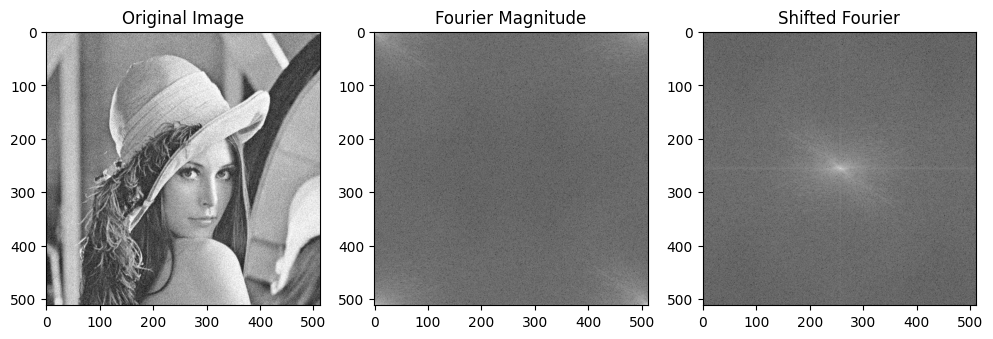

In [4]:
def plot_image(ax, img, title):
    ax.imshow(img, cmap='gray')
    ax.set_title(title)


@error_handler
def apply_filter_in_freq_domain(path):
    img = cv.imread(path, 0)

    fig, axs = plt.subplots(1, 3, figsize=(12, 6))

    # Original Image
    plot_image(axs[0], img, 'Original Image')

    # Fourier Transform
    F = np.fft.fft2(img)
    plot_image(axs[1], np.log1p(np.abs(F)), 'Fourier Magnitude')

    # Shifted Fourier Transform
    Fshift = np.fft.fftshift(F)
    plot_image(axs[2], np.log1p(np.abs(Fshift)), 'Shifted Fourier')
    return img, Fshift


path = '../Images/Lenna-noisy.jpg'
Image, Fshift = apply_filter_in_freq_domain(path)

#### 2.2 Low-Pass Filtering
* ##### Low-Pass filters are used to smooth or blur image, reduce noise, and enhance the low-frequency details.
* ##### Applying a strong low-pass filter may result in a loss of fine details and textures
* ##### [np.fft.ifft2()](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft2.html),  [np.fft.ifftshift()](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html)

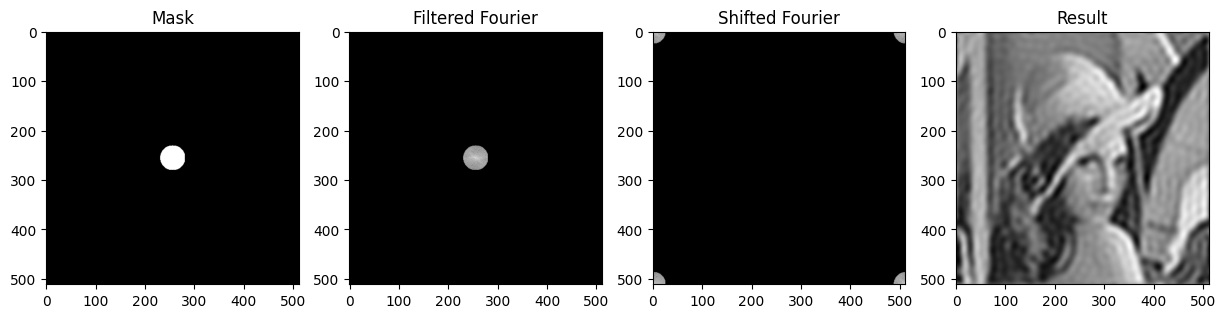

In [13]:
@error_handler
def apply_low_pass_filtering(img, Fshift, D0=50, type='low'):
    # Create Mask
    M, N = img.shape
    circle = cv.getStructuringElement(cv.MORPH_ELLIPSE, (D0, D0))
    center_h = M // 2
    center_w = N // 2
    h_r = D0 // 2
    if type == 'low':
        mask = np.zeros((M, N))
        mask[center_h - h_r:center_h + h_r, center_w - h_r:center_w + h_r] = circle.copy()
    elif type == 'high':
        mask = np.ones((M, N))
        mask[center_h - h_r:center_h + h_r, center_w - h_r:center_w + h_r] = 1 - circle.copy()

    # Create Subplots
    fig, axs = plt.subplots(1, 4, figsize=(15, 7))

    # Mask Image
    plot_image(axs[0], mask, 'Mask')

    # Apply Filter
    Gshift = Fshift * mask  # is equal to: cv.bitwise_and(mask, np.log1p(np.abs(Fshift)))
    plot_image(axs[1], np.log1p(np.abs(Gshift)), 'Filtered Fourier')

    # Shifted Fourier
    G = np.fft.ifftshift(Gshift)
    plot_image(axs[2], np.log1p(np.abs(G)), 'Shifted Fourier')

    # Filtered Image
    res = np.abs(np.fft.ifft2(G))
    plot_image(axs[3], res, 'Result')

    plt.show()


apply_low_pass_filtering(Image, Fshift, D0=50, type='low')

#### 2.3 High-Pass Filtering
* ##### High-Pass filters are applied to an image to emphasize edges, fine details, and other high-frequency features.
* #####  Frequencies above the cutoff are passed, while those below are reduced.


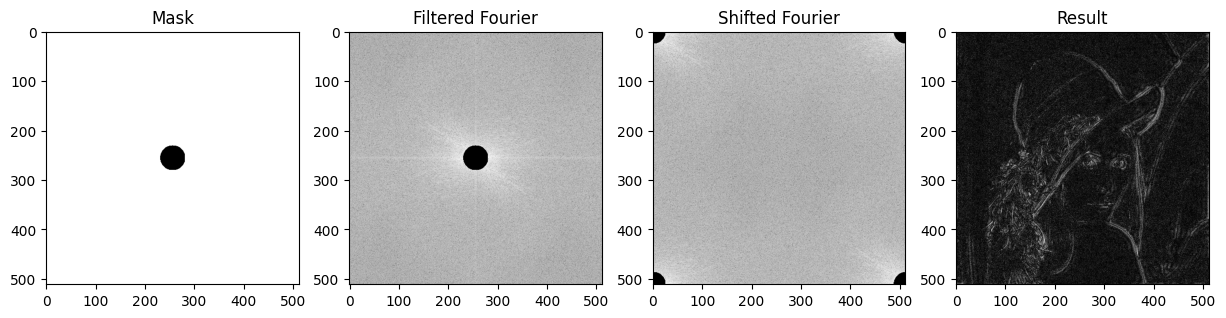

In [15]:
# high pass filtering
apply_low_pass_filtering(Image, Fshift, D0=50, type='high')

## _The End_.